#### Binary Search
##### Compare execution of linear and binary search

Linear search algorithms start with the first element in the array and checking if it matches the values for which we are looking. It keeps iterating through the array until it finds the match. Linear search's execution time is $O(n)$

Binary search algorithms start in the middle of the array and see if the middle element matches the number for which we are searching. If it's not a match, it checks if the number we are searching for is greater than or less than that value. Essentially, by using this technique, we can immediately eliminate half the array given we know that the number for which we are searching is less than or equal to the middle value of that array; this is why putting the arrays in ascending order is so critical. Binary Search's execution time is $O(log n)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
#Base code for linear search algorithm
def linear_search(list, item):
    low = 0
    high = len(list) - 1
    
    while low <= high:
        if list[low] == item:
            return low
        else:
            low = low + 1
    return None

In [3]:
#Base code for binary search algorithm
def binary_search(list, item):
    low = 0
    high = len(list) - 1
    
    while low <= high:
        mid = (low + high)//2
        guess = list[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
    return None

In [4]:
#Create 5 arrays of size 512, 1,024, 2,048, 4,096, and 8,192.
#Set random seed
np.random.seed(107)

#Variables for the five different list sizes
size1 = 512
size2 = 1024
size3 = 2048
size4 = 4096
size5 = 8192

#Create arrays of randomly generated numers for each different size
list1 = np.array(np.random.randint(0, 1000000, size = size1))
list2 = np.array(np.random.randint(0, 1000000, size = size2))
list3 = np.array(np.random.randint(0, 1000000, size = size3))
list4 = np.array(np.random.randint(0, 1000000, size = size4))
list5 = np.array(np.random.randint(0, 1000000, size = size5))

#Create 1 list of all 5 different arrays
list_all = [list1, list2, list3, list4, list5]

In [5]:
#Sort each of the random number arrays from smallest to largest while calculating the sort performance time.

#Create empty list to append times for each sort
list_sort_time = []

for h in list_all:
    start_time_sort = time.clock()
    h = np.sort(h)
    sort_time = time.clock() - start_time_sort
    list_sort_time.append(sort_time)

In [6]:
#Run both the linear and binary search algorithms calculating the performance times

#Create empty lists to store the outcome and times for the loops in
outcomes_linear = [] #create empty list for linear outcomes
times_linear = []   #create empty list for times for linear search

#Execute the linear search algorithm by looping through all 5 arrays
for i in list_all:
    start_time_linear = time.clock()
    x_linear = linear_search(i, i[len(i)-1])
    outcomes_linear.append(x_linear)
    t_linear = time.clock() - start_time_linear
    times_linear.append(t_linear)

#Execute the binary search algorithm by looping through all 5 arrays
outcomes_binary = []  #create empty list for binary outcomes
times_binary = []   #create empty list for times for binary search

#Execute the binary search algorithm by looping through all 5 arrays
for i in list_all:
    start_time_binary = time.clock()
    x_binary = binary_search(i, i[len(i)-1])
    outcomes_binary.append(x_binary)
    t_binary = time.clock() - start_time_binary
    times_binary.append(t_binary)
    
    
search_dict = {'Array Size': outcomes_linear, 'Sort Time':list_sort_time, 'Linear Search Time':times_linear, 'Binary Search Time':times_binary}
search_df = pd.DataFrame.from_dict(search_dict)

#Add calculated fields for total perfomances times (sort + search)
search_df["Linear Search Plus Sort Time"] = search_df["Sort Time"] + search_df["Linear Search Time"] 
search_df["Binary Search Plus Sort Time"] = search_df["Sort Time"] + search_df["Binary Search Time"]
print(search_df)

   Array Size  Binary Search Time  Linear Search Time  Sort Time  \
0         511            0.000009            0.000098   0.000088   
1        1023            0.000005            0.000159   0.000332   
2        2047            0.000005            0.000341   0.000183   
3        4095            0.000006            0.001247   0.000741   
4        8191            0.000005            0.001639   0.000588   

   Linear Search Plus Sort Time  Binary Search Plus Sort Time  
0                      0.000186                      0.000096  
1                      0.000491                      0.000337  
2                      0.000524                      0.000188  
3                      0.001988                      0.000747  
4                      0.002227                      0.000593  


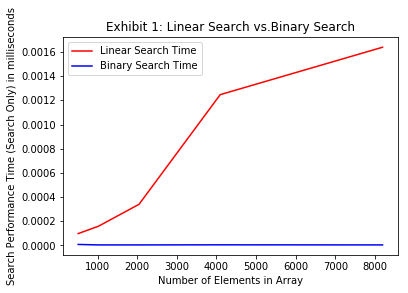

In [7]:
#Plot graph for both linear and binary search showing time by search type and aray size 
plt.plot(search_df["Array Size"], search_df["Linear Search Time"], color = "red")
plt.plot(search_df["Array Size"], search_df["Binary Search Time"], color = "blue")
plt.title("Exhibit 1: Linear Search vs.Binary Search")
plt.ylabel("Search Performance Time (Search Only) in milliseconds")
plt.xlabel("Number of Elements in Array")
plt.legend()
plt.show()

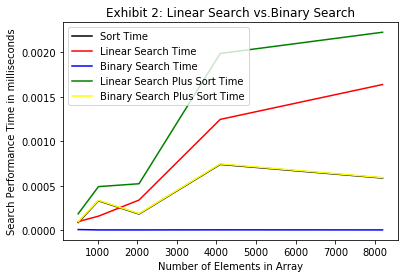

In [8]:
#Plot graph for both linear and binary search showing all performance times by array size and search type
plt.plot(search_df["Array Size"], search_df["Sort Time"], color = "black")
plt.plot(search_df["Array Size"], search_df["Linear Search Time"], color = "red")
plt.plot(search_df["Array Size"], search_df["Binary Search Time"], color = "blue")
plt.plot(search_df["Array Size"], search_df["Linear Search Plus Sort Time"], color = "green")
plt.plot(search_df["Array Size"], search_df["Binary Search Plus Sort Time"], color = "yellow")
plt.title("Exhibit 2: Linear Search vs.Binary Search")
plt.xlabel("Number of Elements in Array")
plt.ylabel("Search Performance Time in milliseconds")
plt.legend()
plt.show()